# Assignment 1: Labor Supply and Children

## 0: Setup and solve model

In [143]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from DynLaborFertModel import *

# save and load models
save = False
load = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Estimate $\beta_1$

In [144]:
model_est = DynLaborFertModelClass(name='estimation', load=True, par={'Nk':20, 'Na':50}) #coarser grid for estimation 
kwargs = {'method':'brentq', 'bracket':(0.04, 0.06), 'maxiter': 10, 'xtol':0.001}

if model_est.sol.solved == False:
    model_est.estimate(**kwargs)

if save:
    model_est.save()

beta_1 = model_est.par.beta_1

#### 1.1 Solve and simulate baseline model with estimated $\beta_1$

In [145]:
model = get_model_solution(name='baseline', load=load, save=save, par={'beta_1':beta_1})

## 2. Marshall elasticity

In [146]:
model_tax = get_model_solution('tax', load=load, save=save, par={'beta_1':beta_1, 'tau':model.par.tau*1.01})

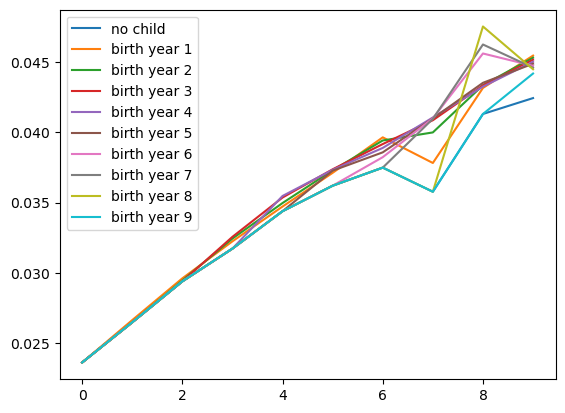

In [147]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for t in range(model.par.simT):
    label = 'no child' if t == 0 else f'birth year {t}'
    plt.plot(marshall_age_birth(model, model_tax, t), label=label)
plt.legend()

## 3.  Introduce spouse

In [148]:
model_spouse = get_model_solution(name='spouse', load=load, save=save, par={'y0':0.1,'y1':0.01, 'beta_1':beta_1})

In [149]:
# with tax increase
model_spouse_tax = get_model_solution(name='spouse_tax', load=load, save=save, par={'y0':0.1,'y1':0.01, 'beta_1':beta_1, 'tau':model_spouse.par.tau*1.01})

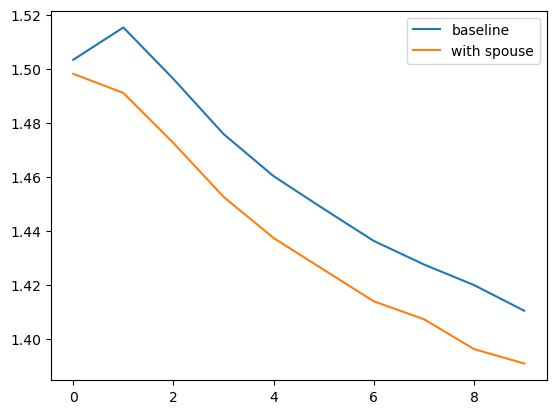

In [150]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(model.sim.h.mean(axis=0), label='baseline')
ax.plot(model_spouse.sim.h.mean(axis=0), label='with spouse')
ax.legend()

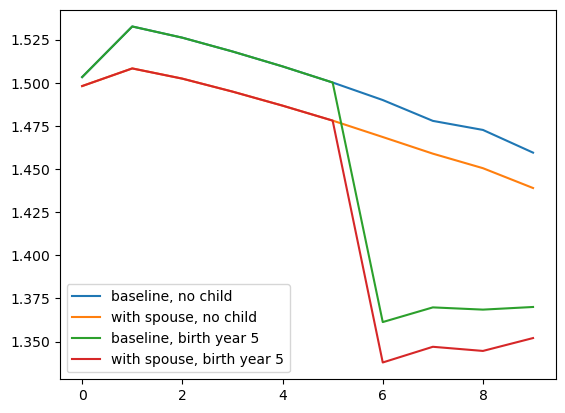

In [151]:
I = model.sim.n[:,-1] == 0
birthyear = np.argmax(np.diff(model.sim.n), axis=1)
year = 5

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(model.sim.h[I].mean(axis=0), label='baseline, no child')
ax.plot(model_spouse.sim.h[I].mean(axis=0), label='with spouse, no child')

ax.plot(model.sim.h[birthyear == year].mean(axis=0), label=f'baseline, birth year {year}')
ax.plot(model_spouse.sim.h[birthyear == year].mean(axis=0), label=f'with spouse, birth year {year}')

ax.legend()

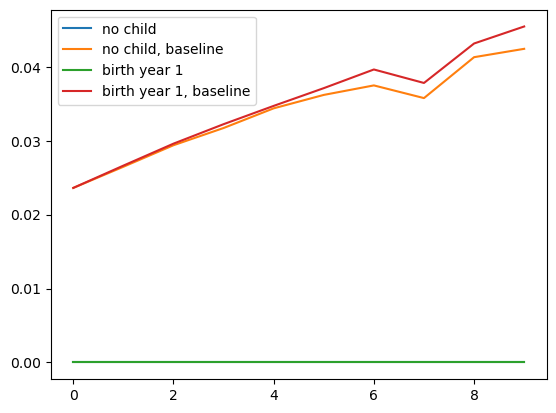

In [152]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for t in [0,1]:
    label = 'no child' if t == 0 else f'birth year {t}'
    ax.plot(marshall_age_birth(model_spouse, model_spouse_tax, t), label=label)

    ax.plot(marshall_age_birth(model, model_tax, t), label=label+', baseline')
ax.legend()

## 4. Childcare cost

In [153]:
model_childcare = get_model_solution(name='childcare_cost', load=load, save=save, par={'beta_1':beta_1, 'c_cost':0.05})

In [154]:
model_childcare_tax = get_model_solution(name='childcare_cost_tax', load=load, save=save,  par={'beta_1':beta_1, 'c_cost':0.05, 'tau':model_childcare.par.tau*1.01})

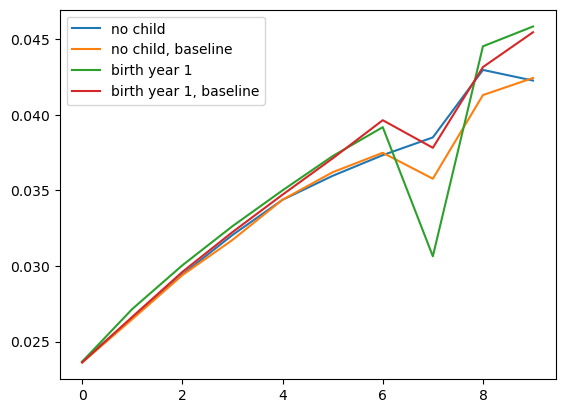

In [155]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for t in [0,1]:
    label = 'no child' if t == 0 else f'birth year {t}'
    ax.plot(marshall_age_birth(model_childcare, model_childcare_tax, t), label=label)

    ax.plot(marshall_age_birth(model, model_tax, t), label=label+', baseline')
ax.legend()

In [156]:
model_childcare.par.c_cost

0.05

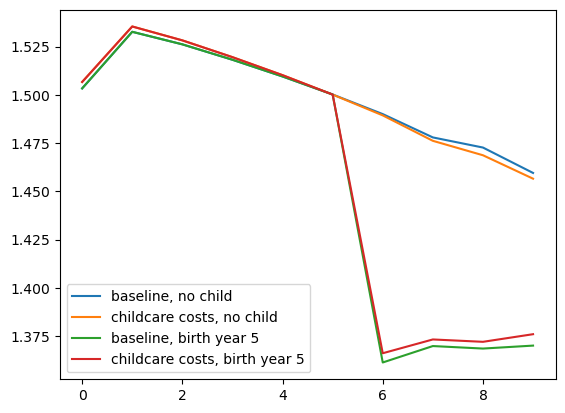

In [157]:
I = model.sim.n[:,-1] == 0
birthyear = np.argmax(np.diff(model.sim.n), axis=1)
year = 5

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(model.sim.h[I].mean(axis=0), label='baseline, no child')
ax.plot(model_childcare.sim.h[I].mean(axis=0), label='childcare costs, no child')

ax.plot(model.sim.h[birthyear == year].mean(axis=0), label=f'baseline, birth year {year}')
ax.plot(model_childcare.sim.h[birthyear == year].mean(axis=0), label=f'childcare costs, birth year {year}')

ax.legend()

## 6. Stochastic spouse

In [158]:
model_stspouse = get_model_solution(name='st_spouse', load=load, save=save, par={'beta_1':beta_1, 'p_spouse':0.8})

In [159]:
model_stspouse_tax = get_model_solution(name='st_spouse_tax', load=load, save=save, par={'beta_1':beta_1, 'p_spouse':0.8, 'tau':model_stspouse.par.tau*1.01})

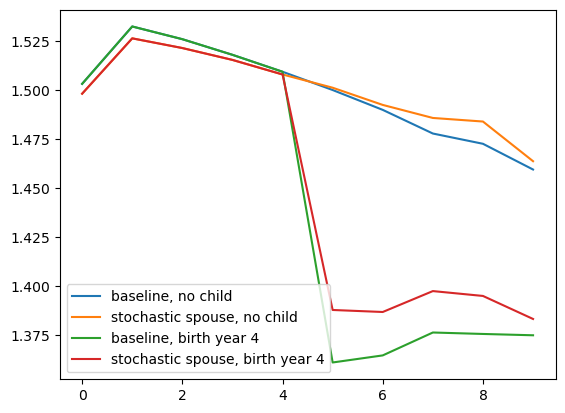

In [160]:
I = model.sim.n[:,-1] == 0
birthyear = np.argmax(np.diff(model.sim.n), axis=1)
year = 4

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(model.sim.h[I].mean(axis=0), label='baseline, no child')
ax.plot(model_stspouse.sim.h[I].mean(axis=0), label='stochastic spouse, no child')

ax.plot(model.sim.h[birthyear == year].mean(axis=0), label=f'baseline, birth year {year}')
ax.plot(model_stspouse.sim.h[birthyear == year].mean(axis=0), label=f'stochastic spouse, birth year {year}')

ax.legend()

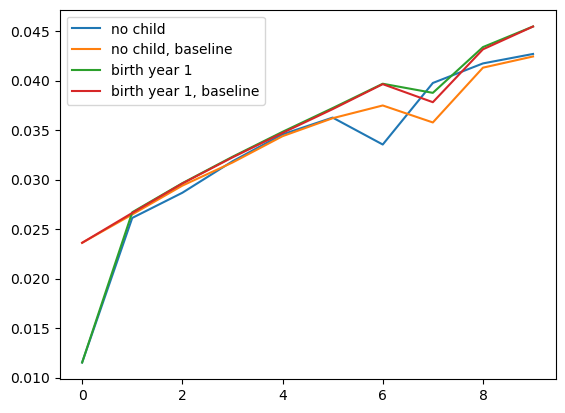

In [161]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for t in [0,1]:
    label = 'no child' if t == 0 else f'birth year {t}'
    ax.plot(marshall_age_birth(model_stspouse, model_stspouse_tax, t), label=label)

    ax.plot(marshall_age_birth(model, model_tax, t), label=label+', baseline')
ax.legend()